In [119]:
from helper_functions import walk_through_dir, create_tensorboard_callback, plot_loss_curves, compare_historys

In [2]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [3]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [4]:
import tensorflow as tf

In [5]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

In [6]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.


Found 2500 files belonging to 10 classes.


2023-09-15 13:30:56.680595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-15 13:30:56.786822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-15 13:30:56.786974: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels,"\n")

tf.Tensor(
[[[[ 10.723214    8.624999    6.991071 ]
   [  8.490434    8.42028    10.455357 ]
   [  7.878187    6.5267854  11.36926  ]
   ...
   [ 44.01084    14.714286    8.121177 ]
   [ 44.688114   13.392216    4.9368677]
   [ 51.803547   14.9081335   4.9406934]]

  [[  8.411352    8.          6.       ]
   [  6.1052294   6.1052294   7.9228315]
   [  6.18176     5.783164    7.815689 ]
   ...
   [ 39.854588   12.327177    8.940689 ]
   [ 39.332253   12.          4.8233514]
   [ 43.60649    13.41134     3.3660583]]

  [[  6.8054843   8.230229    5.517857 ]
   [  4.785714    6.785714    5.3571424]
   [  9.1071415   8.214286    6.0446434]
   ...
   [ 30.696438    9.910723    9.       ]
   [ 29.336098    8.978956    6.038919 ]
   [ 30.92857     8.785714    3.2142859]]

  ...

  [[220.6697    202.6697    182.6697   ]
   [213.08038   195.08038   173.23473  ]
   [208.66072   190.83035   166.49107  ]
   ...
   [238.68686   245.8565    251.17792  ]
   [235.21426   242.21426   250.21426  ]
   [2

In [10]:
# 1. Create the based model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False
                                                  )
# 2. Freeze the base model (so the underlying pre-trained patterens aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If you are using a model like Resnet50V2 you will need to normalize the inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing the inputs to the base model {x.shape}")

# 6. Average Pool the outputs of the base model (aggregate the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name="output_layer")(x)

# 8. Compile the inputs and outputs with our model

model_0 = tf.keras.Model(inputs, outputs)


# 9. Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_feature_extraction")])

Shape after passing the inputs to the base model (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230915-133058
Epoch 1/5


2023-09-15 13:31:02.515400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2023-09-15 13:31:02.661243: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-15 13:31:02.874701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-15 13:31:02.944755: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5570201c67f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-15 13:31:02.944779: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2023-09-15 13:31:02.994866: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


 1/24 [>.............................] - ETA: 1:39 - loss: 2.4785 - accuracy: 0.0312

2023-09-15 13:31:03.183544: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-15 13:31:03.240323: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 [==============================] - 7s 108ms/step - loss: 1.8788 - accuracy: 0.4280 - val_loss: 1.3451 - val_accuracy: 0.6924
Epoch 2/5
24/24 [==============================] - 2s 70ms/step - loss: 1.0903 - accuracy: 0.7667 - val_loss: 0.8850 - val_accuracy: 0.8257
Epoch 3/5
24/24 [==============================] - 2s 70ms/step - loss: 0.7777 - accuracy: 0.8413 - val_loss: 0.7260 - val_accuracy: 0.8322
Epoch 4/5
24/24 [==============================] - 2s 71ms/step - loss: 0.6317 - accuracy: 0.8667 - val_loss: 0.6170 - val_accuracy: 0.8602
Epoch 5/5
24/24 [==============================] - 2s 70ms/step - loss: 0.5415 - accuracy: 0.8907 - val_loss: 0.5620 - val_accuracy: 0.8635


In [11]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 3s 37ms/step - loss: 0.5523 - accuracy: 0.8644


[0.5522522926330566, 0.8644000291824341]

In [12]:
for layer_number, layer in enumerate(base_model.layers):
    print(f"{layer_number} : {layer.name}")

0 : input_1
1 : rescaling
2 : normalization
3 : rescaling_1
4 : stem_conv_pad
5 : stem_conv
6 : stem_bn
7 : stem_activation
8 : block1a_dwconv
9 : block1a_bn
10 : block1a_activation
11 : block1a_se_squeeze
12 : block1a_se_reshape
13 : block1a_se_reduce
14 : block1a_se_expand
15 : block1a_se_excite
16 : block1a_project_conv
17 : block1a_project_bn
18 : block2a_expand_conv
19 : block2a_expand_bn
20 : block2a_expand_activation
21 : block2a_dwconv_pad
22 : block2a_dwconv
23 : block2a_bn
24 : block2a_activation
25 : block2a_se_squeeze
26 : block2a_se_reshape
27 : block2a_se_reduce
28 : block2a_se_expand
29 : block2a_se_excite
30 : block2a_project_conv
31 : block2a_project_bn
32 : block2b_expand_conv
33 : block2b_expand_bn
34 : block2b_expand_activation
35 : block2b_dwconv
36 : block2b_bn
37 : block2b_activation
38 : block2b_se_squeeze
39 : block2b_se_reshape
40 : block2b_se_reduce
41 : block2b_se_expand
42 : block2b_se_excite
43 : block2b_project_conv
44 : block2b_project_bn
45 : block2b_dr

In [13]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [14]:
# Summery of Whole Model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

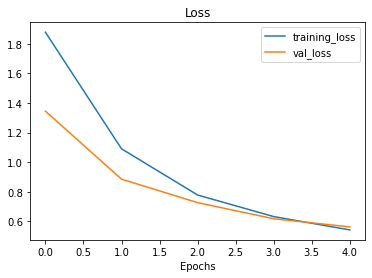

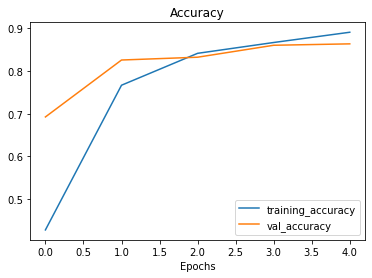

In [15]:
plot_loss_curves(history_0)

In [16]:
## Get a Feature Vector from the Trained Model

input_shape = (1,4,4,3)

input_tensor = tf.random.normal(input_shape)

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(input_tensor.shape,global_average_pooled_tensor.shape)

(1, 4, 4, 3) (1, 3)


### Running a Series of Transfer Learning Experiments

#### Prepare the Data

In [17]:
# Setup the data loaders.
IMG_SIZE = (224,224)

train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = test_dir

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                           batch_size=32,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size=32,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### To add data Augumentation to our model we can add the layer directly to our model building code.

```tf.keras.layers.experimental.preprocessing()```

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augumentation stage with horizontal flipping, rotations, zooms, etc
data_augumentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1/255.) # Add for models like ResNet50V2 but no need for Efficeintnet
], name="data_augmentation")

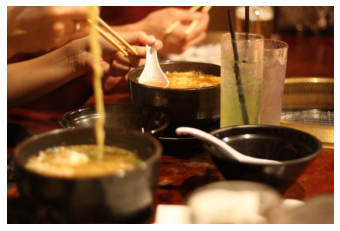

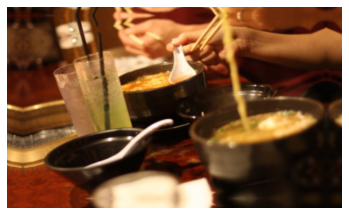

In [19]:
# View a random image and compare it to its orignal image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_10_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))

image_path = target_dir + "/" + random_image
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)
plt.axis(False)

aug_img = data_augumentation(img)
plt.figure()
plt.axis(False)
plt.imshow(aug_img/255.)

In [20]:
# Setup Our Model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create Input Layer  
inputs = layers.Input(shape=input_shape, name="input layer")

# Add the Data augmentation Sequential model as a layer
x = data_augumentation(inputs)

# Give base model the inputs after the augmentation 
x = base_model(x, training=True)

# Pool the output features of the base model
x = layers.GlobalAveragePooling2D(name="Global_Average_Pooling_layer")(x)

# Add the Dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make the model using inputs and outputs.

model_1 = keras.Model(inputs, outputs)


#Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_1_percent = model_1.fit(train_data_1_percent,
                epochs=5,
                steps_per_epoch=len(train_data_1_percent),
                validation_data=test_data,
                validation_steps=int(0.25 * len(test_data)),
                callbacks=create_tensorboard_callback("transfer_learning","1_percent_data_aug"))

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230915-133118
Epoch 1/5
3/3 [==============================] - 6s 1s/step - loss: 2.4811 - accuracy: 0.1000 - val_loss: 2.1996 - val_accuracy: 0.1727
Epoch 2/5
3/3 [==============================] - 1s 518ms/step - loss: 2.1652 - accuracy: 0.2286 - val_loss: 2.0566 - val_accuracy: 0.2730
Epoch 3/5
3/3 [==============================] - 1s 513ms/step - loss: 2.0169 - accuracy: 0.2429 - val_loss: 1.9422 - val_accuracy: 0.3816
Epoch 4/5
3/3 [==============================] - 1s 515ms/step - loss: 1.8376 - accuracy: 0.4714 - val_loss: 1.8590 - val_accuracy: 0.4359
Epoch 5/5
3/3 [==============================] - 1s 509ms/step - loss: 1.6623 - accuracy: 0.5143 - val_loss: 1.7737 - val_accuracy: 0.4934


In [21]:
model_1.evaluate(test_data)

79/79 [==============================] - 3s 43ms/step - loss: 1.7557 - accuracy: 0.4896


[1.7557357549667358, 0.4896000027656555]

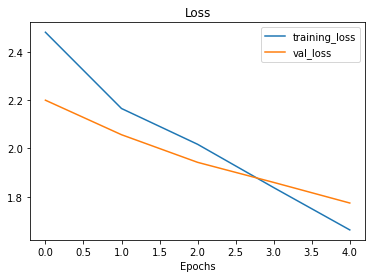

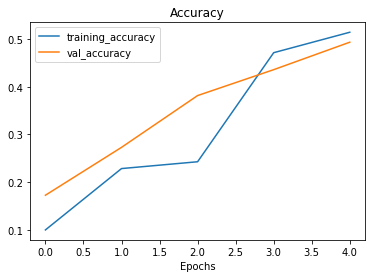

In [22]:
# How the model did with 1 percent data with data augmentation
plot_loss_curves(history_1_percent)

In [145]:
# Model 2
IMAGE_SIZE = (224,224)

train_dir_10_percent = "10_food_classes_10_percent/train"
train_data_10_percent_augmented = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                                      image_size=IMAGE_SIZE,
                                                                                      label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMAGE_SIZE,
                                                               label_mode="categorical" )

Found 750 files belonging to 10 classes.


Found 2500 files belonging to 10 classes.


In [146]:
train_data_10_percent_augmented

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [147]:
# Build the Preprocessing Layer with Sequential Model
from tensorflow.keras.layers.experimental import preprocessing

data_aug = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
], name="Augmentation_layer")


base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input = tf.keras.layers.Input(shape=(224,224,3), name="Input_layer")

x = data_aug(input)

x = base_model(x, training=True)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

output = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(input, output)

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [148]:
# Set the Model checkpoint Callback
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.ckpt"

# Creating Model checkpoint callback that saves the models weights Only.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch", # Save Every Epoch
                                                         verbose=1)

In [149]:
history_model2 = model_2.fit(train_data_10_percent_augmented,
                            epochs=5,
                            steps_per_epoch=len(train_data_10_percent_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=[create_tensorboard_callback("transfer_learning","data_aug_10_percent"), checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/data_aug_10_percent/20230915-170250
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0023 - accuracy: 0.3413
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 272ms/step - loss: 2.0023 - accuracy: 0.3413 - val_loss: 1.4698 - val_accuracy: 0.6484
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3563 - accuracy: 0.6573
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 5s 229ms/step - loss: 1.3563 - accuracy: 0.6573 - val_loss: 1.0371 - val_accuracy: 0.7692
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0518 - accuracy: 0.7427
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 5s 223ms/step - loss: 1.0518 - accuracy: 0.7427 - val_loss: 0.8365 - val_accuracy: 0.8100
Epoch 

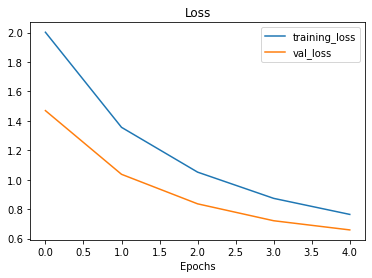

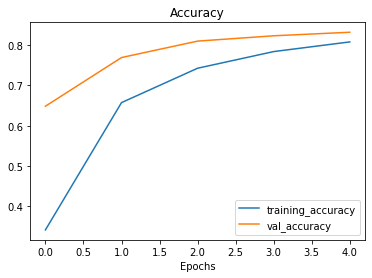

In [150]:
plot_loss_curves(history_model2)

### Comparing the model_0 and model_2 for accuracy

Model0 and model 1 are same but they are trained on different Data.

1. Model 0 is trained on data as it is
2. Model 2 is trained on augmented data

In [151]:
model_0.evaluate(test_data)

79/79 [==============================] - 3s 37ms/step - loss: 0.5523 - accuracy: 0.8644


[0.5522520542144775, 0.8644000291824341]

In [152]:
results_10_percent_data_aug = model_2.evaluate(test_data) # The Augmented Data did not performed well

79/79 [==============================] - 3s 38ms/step - loss: 0.6546 - accuracy: 0.8304


### Loading the model checkpoints weights and evaluate model

In [153]:
model_2.load_weights(checkpoint_path)

In [154]:
# Evaluate model 2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 3s 38ms/step - loss: 0.6592 - accuracy: 0.8312


In [155]:
# Check to see if the trained model weights and loaded model are close to each other
import numpy as np

np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([False, False])

In [156]:
np.array(results_10_percent_data_aug)-np.array(loaded_weights_model_results)

array([-0.00452745, -0.00080001])

In [157]:
model_2.layers

In [158]:
for layer in model_2.layers:
    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7f72d3293c70> True
<keras.src.engine.sequential.Sequential object at 0x7f72d31da430> True
<keras.src.engine.functional.Functional object at 0x7f72bacdc610> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f72d3627e80> True
<keras.src.layers.core.dense.Dense object at 0x7f72babe5a90> True


In [159]:
for num, layer in enumerate(model_2.layers[2].layers):
    print(num, " : ", layer.name, "\t" , layer.trainable)

0  :  input_19 	 False
1  :  rescaling_36 	 False
2  :  normalization_18 	 False
3  :  rescaling_37 	 False
4  :  stem_conv_pad 	 False
5  :  stem_conv 	 False
6  :  stem_bn 	 False
7  :  stem_activation 	 False
8  :  block1a_dwconv 	 False
9  :  block1a_bn 	 False
10  :  block1a_activation 	 False
11  :  block1a_se_squeeze 	 False
12  :  block1a_se_reshape 	 False
13  :  block1a_se_reduce 	 False
14  :  block1a_se_expand 	 False
15  :  block1a_se_excite 	 False
16  :  block1a_project_conv 	 False
17  :  block1a_project_bn 	 False
18  :  block2a_expand_conv 	 False
19  :  block2a_expand_bn 	 False
20  :  block2a_expand_activation 	 False
21  :  block2a_dwconv_pad 	 False
22  :  block2a_dwconv 	 False
23  :  block2a_bn 	 False
24  :  block2a_activation 	 False
25  :  block2a_se_squeeze 	 False
26  :  block2a_se_reshape 	 False
27  :  block2a_se_reduce 	 False
28  :  block2a_se_expand 	 False
29  :  block2a_se_excite 	 False
30  :  block2a_project_conv 	 False
31  :  block2a_project_bn 	

In [160]:
print(len(model_2.layers[2].trainable_variables))

0


In [163]:
base_model.trainable = True  # Set all the layers to be True


# Set the last 10 layers to be True and all before that to False
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the model after updating its training parameters
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics = ["accuracy"])

In [164]:
for i, layer in enumerate(model_2.layers[2].layers):
    print(i, "\t" , layer.name, "\t" , layer.trainable)

0 	 input_19 	 False
1 	 rescaling_36 	 False
2 	 normalization_18 	 False
3 	 rescaling_37 	 False
4 	 stem_conv_pad 	 False
5 	 stem_conv 	 False
6 	 stem_bn 	 False
7 	 stem_activation 	 False
8 	 block1a_dwconv 	 False
9 	 block1a_bn 	 False
10 	 block1a_activation 	 False
11 	 block1a_se_squeeze 	 False
12 	 block1a_se_reshape 	 False
13 	 block1a_se_reduce 	 False
14 	 block1a_se_expand 	 False
15 	 block1a_se_excite 	 False
16 	 block1a_project_conv 	 False
17 	 block1a_project_bn 	 False
18 	 block2a_expand_conv 	 False
19 	 block2a_expand_bn 	 False
20 	 block2a_expand_activation 	 False
21 	 block2a_dwconv_pad 	 False
22 	 block2a_dwconv 	 False
23 	 block2a_bn 	 False
24 	 block2a_activation 	 False
25 	 block2a_se_squeeze 	 False
26 	 block2a_se_reshape 	 False
27 	 block2a_se_reduce 	 False
28 	 block2a_se_expand 	 False
29 	 block2a_se_excite 	 False
30 	 block2a_project_conv 	 False
31 	 block2a_project_bn 	 False
32 	 block2b_expand_conv 	 False
33 	 block2b_expand_bn 	

In [165]:
print(len(model_2.trainable_variables))

12


In [166]:
fine_tune_epochs = 5 + 5 # Fiver initial epochs in the base train model

# Refit the model ( same as model 2 except more trainable layers )
history_fined = model_2.fit(train_data_10_percent,
                            epochs=fine_tune_epochs,
                            validation_data=test_data,
                            validation_steps=int(0.25 * len(test_data)),
                            initial_epoch=history_model2.epoch[-1], # Start training from last epoch
                            callbacks=[create_tensorboard_callback("transfer_learning","fined_tuned_model")]
                            )

Saving TensorBoard log files to: transfer_learning/fined_tuned_model/20230915-170335
Epoch 5/10


2023-09-15 17:03:38.564152: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_18/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


24/24 [==============================] - 8s 155ms/step - loss: 0.7930 - accuracy: 0.7987 - val_loss: 0.6545 - val_accuracy: 0.8339
Epoch 6/10
24/24 [==============================] - 3s 129ms/step - loss: 0.6762 - accuracy: 0.8200 - val_loss: 0.6071 - val_accuracy: 0.8372
Epoch 7/10
24/24 [==============================] - 3s 125ms/step - loss: 0.6103 - accuracy: 0.8467 - val_loss: 0.5859 - val_accuracy: 0.8339
Epoch 8/10
24/24 [==============================] - 3s 128ms/step - loss: 0.5349 - accuracy: 0.8693 - val_loss: 0.5595 - val_accuracy: 0.8322
Epoch 9/10
24/24 [==============================] - 3s 125ms/step - loss: 0.4996 - accuracy: 0.8693 - val_loss: 0.5119 - val_accuracy: 0.8470
Epoch 10/10
24/24 [==============================] - 3s 125ms/step - loss: 0.4543 - accuracy: 0.8933 - val_loss: 0.5001 - val_accuracy: 0.8586


In [167]:
model_2.evaluate(test_data)

79/79 [==============================] - 3s 38ms/step - loss: 0.5061 - accuracy: 0.8548


[0.5060706734657288, 0.8547999858856201]

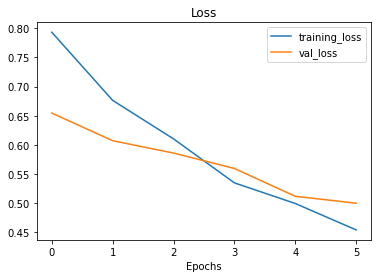

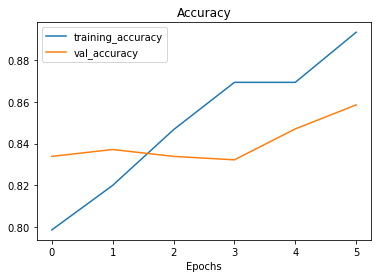

In [168]:
plot_loss_curves(history_fined)

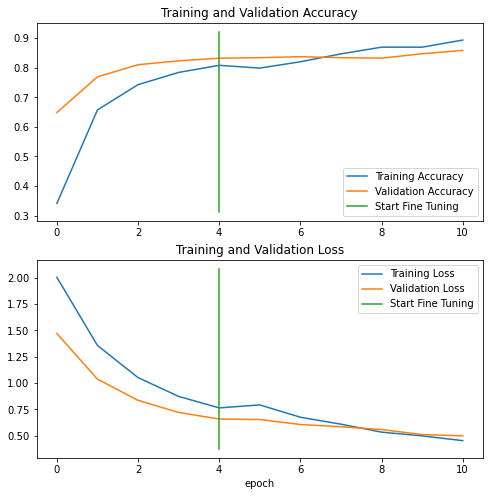

In [169]:
compare_historys(history_model2, history_fined)

In [ ]:
import tensorflow as tf 
from helper_functions import walk_through_dir

In [ ]:
train_dir_all_data = "10_food_classes_all_data\train"
test_dir = "10_food_classes_all_data\test"

In [ ]:
walk_through_dir(train_dir_all_data)

In [ ]:
IMAGE_SIZE = (224,224)